In [62]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("Results/Antiferro_Hex_16_1500_Simulation_1000.csv")
df_low = df[df['Temperature'] <= 0.4]
df_high = df[df['Temperature'] >= 1.0]

In [64]:
fit_low = linregress(df_low["Temperature"], df_low["Energy"])
fit_high = linregress(df_high["Temperature"], df_high["Energy"])
crit_temp = -(fit_high.intercept-fit_low.intercept)/(fit_high.slope-fit_low.slope)
new_low_df = df[df['Temperature'] <= crit_temp+0.1]
new_high_df = df[df['Temperature'] >= crit_temp-0.065]

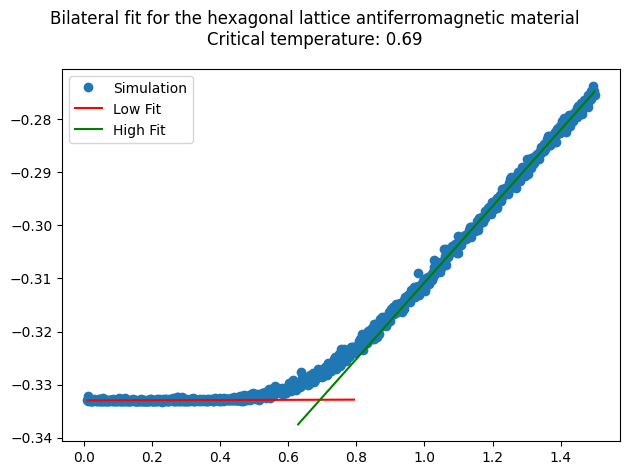

In [65]:
plt.clf()
plt.plot(df["Temperature"], df['Energy'], 'o', label='Simulation')
plt.plot(new_low_df["Temperature"], fit_low.intercept + fit_low.slope*new_low_df["Temperature"], 'r', label='Low Fit')
plt.plot(new_high_df["Temperature"], fit_high.intercept + fit_high.slope*new_high_df["Temperature"], 'g', label='High Fit')
plt.legend()
plt.suptitle(f"Bilateral fit for the hexagonal lattice antiferromagnetic material\nCritical temperature: {crit_temp:.2f}")
plt.tight_layout()
plt.show()